In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x_train = pd.read_csv('./H2W3 data files/Xtrain.csv', header=None).to_numpy()
y_train = pd.read_csv('./H2W3 data files/ytrain.csv', header=None).to_numpy().ravel()
x_test = pd.read_csv('./H2W3 data files/Xtest.csv', header=None).to_numpy()
y_test = pd.read_csv('./H2W3 data files/ytest.csv', header=None).to_numpy().ravel()

## Spam Mail Detector

### Part (a) - Standardize

#### Standardize

In [3]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train)

#### K-Fold CV

In [4]:
cv_acc = []
reg = np.logspace(-3,3,num=50)

for i in range(len(reg)):
    cv_acc_runs = []
    for j in range(5):
        skf = StratifiedKFold(n_splits=5, shuffle=True)
        skf.get_n_splits(x_train_std, y_train)
        cv_acc_skf = []
        for train_index, test_index in skf.split(x_train_std, y_train):
            X_skf_train, X_skf_test = x_train[train_index], x_train[test_index]
            y_skf_train, y_skf_test = y_train[train_index], y_train[test_index]
            logreg_skf = LogisticRegression(penalty='l2', C=reg[i], max_iter=10000).fit(X_skf_train, y_skf_train)
            cv_acc_skf.append(accuracy_score(y_skf_test, logreg_skf.predict(X_skf_test)))
        cv_acc_runs.append(np.mean(cv_acc_skf))
    cv_acc.append(np.mean(cv_acc_runs))

#### Chosen Value of C

In [5]:
C = reg[np.argmax(cv_acc)]
C

2.023589647725158

In [6]:
#### CV Avg Performance

In [7]:
np.max(cv_acc)

0.9249592169657422

#### Full Training and Testing

In [8]:
logreg_skf = LogisticRegression(penalty='l2', C=C, max_iter=10000).fit(x_train_std, y_train)
train_acc = accuracy_score(y_train, logreg_skf.predict(x_train_std))
train_acc

0.9278955954323002

In [9]:
test_acc = accuracy_score(y_test, logreg_skf.predict(scaler.transform(x_test)))
test_acc

0.9270833333333334

### Part (b) - Transform

#### Transform

In [10]:
x_train_xfm = np.log(x_train+0.1)

#### K-Fold CV

In [11]:
cv_acc = []
reg = np.logspace(-3,3,num=50)

for i in range(len(reg)):
    cv_acc_runs = []
    for j in range(5):
        skf = StratifiedKFold(n_splits=5, shuffle=True)
        skf.get_n_splits(x_train_xfm, y_train)
        cv_acc_skf = []
        for train_index, test_index in skf.split(x_train_xfm, y_train):
            X_skf_train, X_skf_test = x_train[train_index], x_train[test_index]
            y_skf_train, y_skf_test = y_train[train_index], y_train[test_index]
            logreg_skf = LogisticRegression(penalty='l2', C=reg[i], max_iter=10000).fit(X_skf_train, y_skf_train)
            cv_acc_skf.append(accuracy_score(y_skf_test, logreg_skf.predict(X_skf_test)))
        cv_acc_runs.append(np.mean(cv_acc_skf))
    cv_acc.append(np.mean(cv_acc_runs))

#### Chosen Value of C

In [12]:
C = reg[np.argmax(cv_acc)]
C

3.5564803062231287

#### CV Avg Performance

In [13]:
np.max(cv_acc)

0.9257422512234911

#### Full Training and Testing

In [14]:
logreg_skf = LogisticRegression(penalty='l2', C=C, max_iter=10000).fit(x_train_xfm, y_train)
train_acc = accuracy_score(y_train, logreg_skf.predict(x_train_xfm))
train_acc

0.9481239804241436

In [15]:
test_acc = accuracy_score(y_test, logreg_skf.predict(np.log(x_test+0.1)))
test_acc

0.9420572916666666

### Part (c) - Binarize

#### Binarize

In [16]:
zero_threshold_indices = x_train <= 0
one_threshold_indices = x_train > 0
x_train_bin = np.array(x_train)
x_train_bin[zero_threshold_indices] = 0
x_train_bin[one_threshold_indices] = 1

#### K-Fold CV

In [17]:
cv_acc = []
reg = np.logspace(-3,3,num=50)

for i in range(len(reg)):
    cv_acc_runs = []
    for j in range(5):
        skf = StratifiedKFold(n_splits=5, shuffle=True)
        skf.get_n_splits(x_train_bin, y_train)
        cv_acc_skf = []
        for train_index, test_index in skf.split(x_train_bin, y_train):
            X_skf_train, X_skf_test = x_train[train_index], x_train[test_index]
            y_skf_train, y_skf_test = y_train[train_index], y_train[test_index]
            logreg_skf = LogisticRegression(penalty='l2', C=reg[i], max_iter=10000).fit(X_skf_train, y_skf_train)
            cv_acc_skf.append(accuracy_score(y_skf_test, logreg_skf.predict(X_skf_test)))
        cv_acc_runs.append(np.mean(cv_acc_skf))
    cv_acc.append(np.mean(cv_acc_runs))

#### Chosen Value of C

In [18]:
C = reg[np.argmax(cv_acc)]
C

2.023589647725158

#### CV Avg Performance

In [19]:
np.max(cv_acc)

0.9252854812398041

#### Full Training and Testing

In [20]:
logreg_skf = LogisticRegression(penalty='l2', C=C, max_iter=10000).fit(x_train_bin, y_train)
train_acc = accuracy_score(y_train, logreg_skf.predict(x_train_bin))
train_acc

0.935725938009788

In [21]:
zero_threshold_indices = x_test <= 0
one_threshold_indices = x_test > 0
x_test_bin = np.array(x_test)
x_test_bin[zero_threshold_indices] = 0
x_test_bin[one_threshold_indices] = 1
test_acc = accuracy_score(y_test, logreg_skf.predict(x_test_bin))
test_acc

0.927734375

### Visuals

#### (i)

In [22]:
x = np.sum(x_test_bin[:,0:48],axis=1)
y = np.sum(x_test_bin[:,48:54],axis=1)

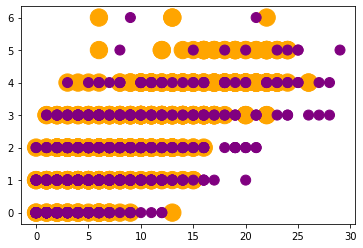

In [23]:
plt.scatter(x, y, c=y_test, s=y_test*200+100, cmap=ListedColormap(['purple','orange']))

#### (ii)

In [24]:
x_spam = np.array(x[y_test == 1])
y_spam = np.array(y[y_test == 1])

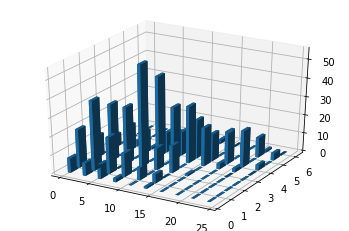

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x_spam, y_spam, bins=10, range=[[0, 26], [0, 6]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

#### (iii)

In [30]:
x_not_spam = np.array(x[y_test == 0])
y_not_spam = np.array(y[y_test == 0])

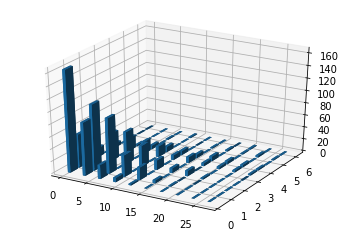

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

hist, xedges, yedges = np.histogram2d(x_not_spam, y_not_spam, bins=10, range=[[0, 29], [0, 6]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()

Seems like spam mail is normally distributed around the extracted features, however, the non-spam mail is almost 0 for all the specified features, which makes sense since the features were designed to catch spam.